In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy as sp
from scipy import stats
import scipy.stats.mstats as mst
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data = pd.read_csv('991_CleanedData.csv', low_memory=False)

#Table of Contents#

**1. Visualizing the data**

**2. Significance across excess vascular age - nominal/ordinal**
- Racial group
- Discrimination category
- History of CVD
- Education
- Income

**3. Significance across excess vascular age - continuous**
- Discrimination score
- CRP
- Perceived Stress

**4. Looking at perceived stress and CRP**

**5. Significance across discrimination scores - nominal/ordinal**
- Education
- History of CVD
- Income

**6. Significance across discrimination scores - continuous**
- CRP
- Perceived stress

#1. Visualizing the data#

- Age (continuous)
- BMI (continuous)
- Discrimination score (continuous)
- Discrimination category (nominal)
- History of CVD (nominal)
- Education (greater than HS) (nominal)
- Income (greater than 50K) (nominal)
- CRP level (continuous)
- Perceived stress (continuous)

Outcome variables:
- LV_AGE_DIFF0
- CVDRISK0

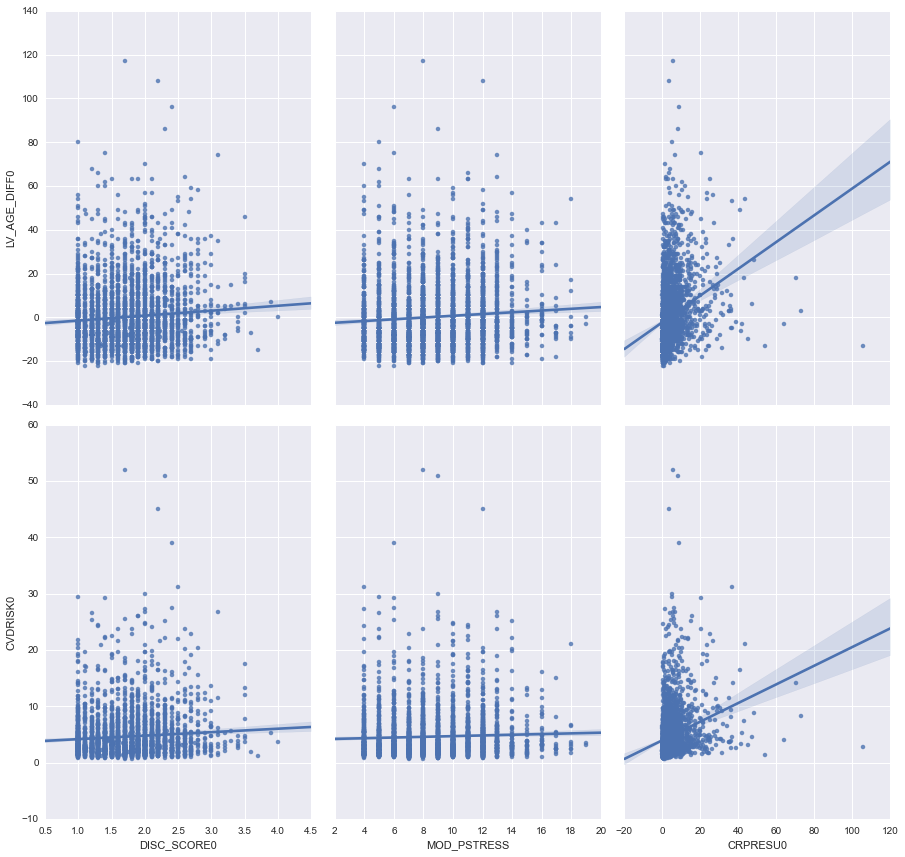

In [2]:
sns.pairplot(data, x_vars=['DISC_SCORE0', 'MOD_PSTRESS', 'CRPRESU0'], 
             y_vars=['LV_AGE_DIFF0', 'CVDRISK0'], size=6, 
             aspect=0.7, kind='reg')

In [3]:
corr_data = data[['AGE0', 'BMI0', 'DISC_SCORE0', 'DISC_CAT0', 'CVD', 
             'DEGREE', 'INCOME0', 'CRPRESU0', 'MOD_PSTRESS', 
             'LV_AGE_DIFF0', 'CVDRISK0']]

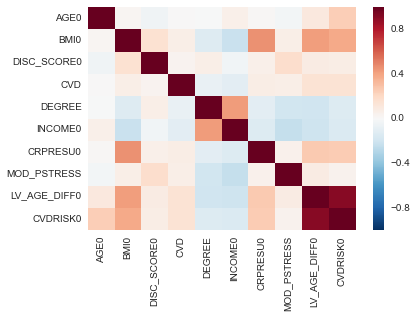

In [4]:
sns.heatmap(corr_data.corr())

In the previous notebooks we saw that discrimination scores did not have a normal distribution. Efforts to transform the data (not shown) did not produce any normal distributions. In addition, as shown in the scatterplots above, there does not appear to be a strong linear relationship; assumptions for linear regression modeling have not been met. Thus, non-parametric methods like Spearman's Rank Correlation will be used for analysis.

#2. Significance Across Excess Vascular Age - Nominal/Ordinal#

Unadjusted analysis - testing for significance against excess vascular age (continuous variable) vs the following categorical/ordinal variables:

- Race (nominal)
- Discrimination category (nominal)
- History of CVD (nominal)
- Education (all categories) (nominal/ordinal)
- Income (all categories) (nominal/ordinal)

Using Kruskal-Wallis since LV_AGE_DIFF0 does not follow normal distribution and no suitable transformation found

In [5]:
y = 'LV_AGE_DIFF0'

###Racial Category###

In [6]:
data.groupby('RACE').LV_AGE_DIFF0.describe()

RACE            
Asian      count     529.000000
           mean       -5.610586
           std        10.129071
           min       -22.000000
           25%       -12.000000
           50%        -7.000000
           75%        -1.000000
           max        57.000000
Black      count     922.000000
           mean        5.931670
           std        17.026539
           min       -19.000000
           25%        -6.000000
           50%         2.000000
           75%        14.000000
           max       117.000000
Caucasian  count    1529.000000
           mean       -2.147155
           std        12.607597
           min       -22.000000
           25%       -11.000000
           50%        -5.000000
           75%         3.000000
           max        75.000000
Hispanic   count     282.000000
           mean        4.695035
           std        12.722577
           min       -13.000000
           25%        -4.000000
           50%         2.000000
           75%        1

In [7]:
black = data[data.RACE == 'Black']
asian = data[data.RACE == 'Asian']
white = data[data.RACE == 'Caucasian']
hispanic = data[data.RACE == 'Hispanic']

mst.kruskalwallis(black[y], asian[y], white[y], hispanic[y])

KruskalResult(statistic=355.56420806522755, pvalue=9.3074053783342472e-77)

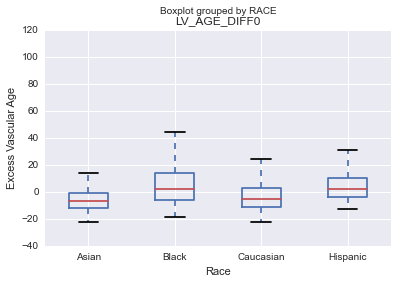

In [8]:
data.boxplot(column="LV_AGE_DIFF0", by = "RACE")
plt.xlabel('Race')
plt.ylabel('Excess Vascular Age')

###Discrimination Category###

In [9]:
data.groupby('DISC_CAT0').LV_AGE_DIFF0.describe()

DISC_CAT0       
HIGH       count    1646.000000
           mean        1.184690
           std        14.930230
           min       -21.000000
           25%        -9.000000
           50%        -2.000000
           75%         7.000000
           max       108.000000
LOW        count    1616.000000
           mean       -0.871287
           std        13.667100
           min       -22.000000
           25%       -10.000000
           50%        -4.000000
           75%         4.000000
           max       117.000000
dtype: float64

In [10]:
high = data[data.DISC_CAT0 == 'HIGH']
low = data[data.DISC_CAT0 == 'LOW']

mst.kruskalwallis(high[y], low[y])

KruskalResult(statistic=14.466253212827171, pvalue=0.00014269319069308824)

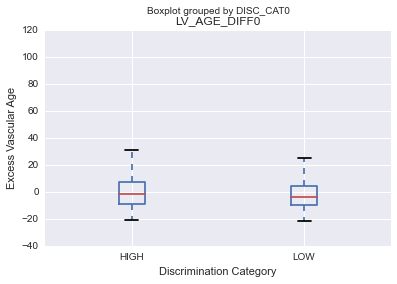

In [11]:
data.boxplot(column="LV_AGE_DIFF0", by = "DISC_CAT0")
plt.xlabel('Discrimination Category')
plt.ylabel('Excess Vascular Age')

###History of CVD###

In [12]:
data.groupby('CVD').LV_AGE_DIFF0.describe()

CVD       
0    count    3171.000000
     mean       -0.193314
     std        14.034551
     min       -22.000000
     25%       -10.000000
     50%        -3.000000
     75%         5.000000
     max       117.000000
1    count      91.000000
     mean       12.692308
     std        19.068119
     min       -17.000000
     25%        -3.000000
     50%         9.000000
     75%        24.000000
     max        64.000000
dtype: float64

In [13]:
y_cvd = data[data.CVD == 1]
n_cvd = data[data.CVD == 0]

mst.kruskalwallis(y_cvd[y], n_cvd[y])

KruskalResult(statistic=48.087353751795973, pvalue=4.07647204364071e-12)

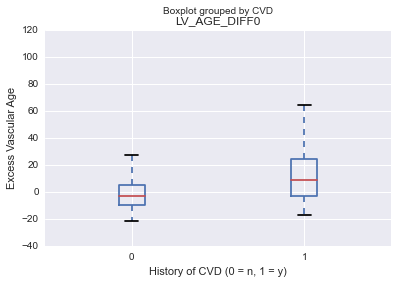

In [14]:
data.boxplot(column="LV_AGE_DIFF0", by = "CVD")
plt.xlabel('History of CVD (0 = n, 1 = y)')
plt.ylabel('Excess Vascular Age')

###Education###

In [15]:
data.groupby('DEGREE').LV_AGE_DIFF0.describe()

DEGREE       
1       count     235.000000
        mean        4.536170
        std        13.771400
        min       -20.000000
        25%        -4.500000
        50%         1.000000
        75%        11.500000
        max        57.000000
2       count     572.000000
        mean        3.445804
        std        14.871623
        min       -20.000000
        25%        -7.000000
        50%         0.000000
        75%        10.250000
        max        66.000000
3       count    1069.000000
        mean        1.985968
        std        16.096816
        min       -22.000000
        25%        -9.000000
        50%        -2.000000
        75%         8.000000
        max       117.000000
4       count     651.000000
        mean       -3.267281
        std        11.518780
        min       -21.000000
        25%       -11.000000
        50%        -6.000000
        75%         2.000000
        max        96.000000
5       count     735.000000
        mean       -3.389116


In [16]:
edu1 = data[data.DEGREE == 1]
edu2 = data[data.DEGREE == 2]
edu3 = data[data.DEGREE == 3]
edu4 = data[data.DEGREE == 4]
edu5 = data[data.DEGREE == 5]

mst.kruskalwallis(edu1[y], edu2[y], edu3[y], edu4[y], edu5[y])

KruskalResult(statistic=182.35532370205848, pvalue=2.3263243846738331e-38)

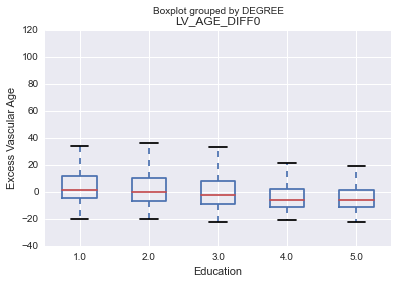

In [17]:
data.boxplot(column="LV_AGE_DIFF0", by = "DEGREE")
plt.xlabel('Education')
plt.ylabel('Excess Vascular Age')

###Income###

In [18]:
inc1 = data[data.INCOME0 == 1]
inc2 = data[data.INCOME0 == 2]
inc3 = data[data.INCOME0 == 3]
inc4 = data[data.INCOME0 == 4]

mst.kruskalwallis(inc1[y], inc2[y], inc3[y], inc4[y])

KruskalResult(statistic=171.21332865294204, pvalue=6.9618013608725345e-37)

In [19]:
data.groupby('INCOME0').LV_AGE_DIFF0.describe()

INCOME0       
1        count     483.000000
         mean        6.391304
         std        16.069806
         min       -18.000000
         25%        -5.000000
         50%         3.000000
         75%        13.000000
         max        86.000000
2        count    1077.000000
         mean        0.826370
         std        14.643805
         min       -21.000000
         25%        -9.000000
         50%        -2.000000
         75%         6.000000
         max       117.000000
3        count    1240.000000
         mean       -1.137097
         std        13.644651
         min       -21.000000
         25%       -10.000000
         50%        -4.000000
         75%         4.000000
         max        96.000000
4        count     462.000000
         mean       -4.383117
         std        10.929193
         min       -22.000000
         25%       -12.000000
         50%        -7.000000
         75%         0.000000
         max        60.000000
dtype: float64

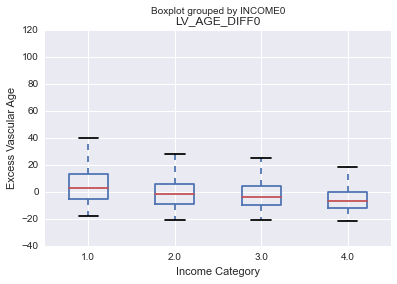

In [20]:
data.boxplot(column="LV_AGE_DIFF0", by = "INCOME0")
plt.xlabel('Income Category')
plt.ylabel('Excess Vascular Age')

#3. Significance Across Excess Vascular Age - Continuous#

Using Spearman's correlation to look at unadjusted correlation coefficients for the following continuous variables:

- Discrimination score
- CRP
- Perceived Stress


###Discrimination Score###

In [21]:
sp.stats.spearmanr(data.DISC_SCORE0, data[y])

SpearmanrResult(correlation=0.052270585216338851, pvalue=0.0028239823878181323)

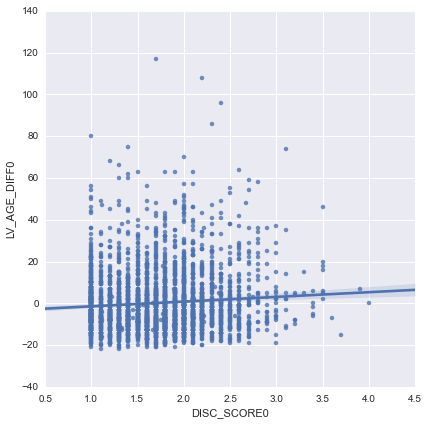

In [22]:
sns.pairplot(data, x_vars='DISC_SCORE0', y_vars='LV_AGE_DIFF0', size=6, kind='reg')

###C-Reactive Protein###

In [23]:
sp.stats.spearmanr(data.CRPRESU0, data[y])

SpearmanrResult(correlation=0.39758326111474651, pvalue=5.5329812170917954e-124)

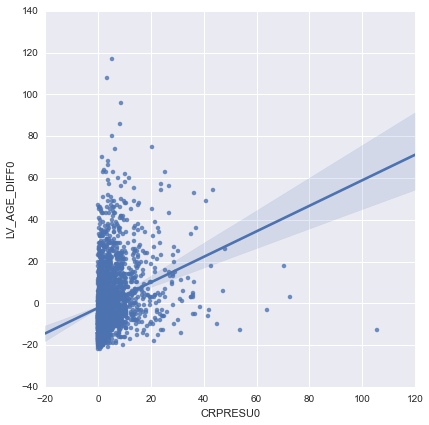

In [24]:
sns.pairplot(data, x_vars='CRPRESU0', y_vars='LV_AGE_DIFF0', size=6, kind='reg')

###Perceived Stress###

In [25]:
sp.stats.spearmanr(data.MOD_PSTRESS, data[y])

SpearmanrResult(correlation=0.094711371194957247, pvalue=5.9782573093418337e-08)

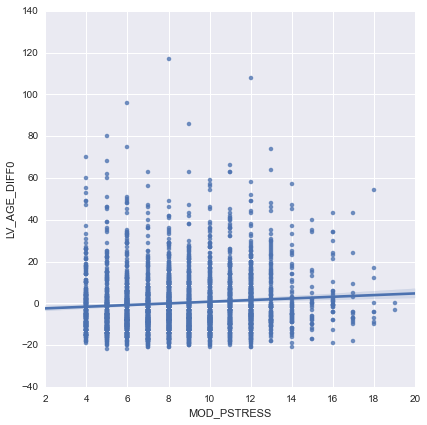

In [26]:
sns.pairplot(data, x_vars='MOD_PSTRESS', y_vars='LV_AGE_DIFF0', size=6, kind='reg')

#4. Looking at Perceived Stress and C-Reactive Protein Levels#

In [27]:
sp.stats.spearmanr(data.MOD_PSTRESS, data.CRPRESU0)

SpearmanrResult(correlation=0.058733874507326166, pvalue=0.00079040381994907236)

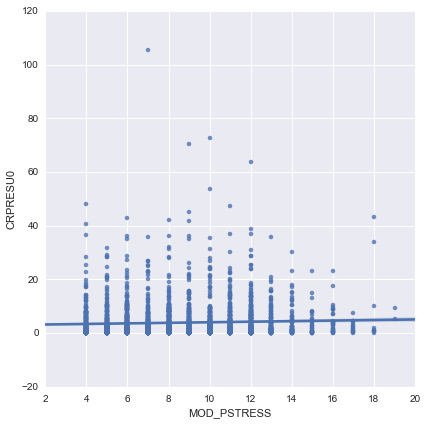

In [28]:
sns.pairplot(data, x_vars='MOD_PSTRESS', y_vars='CRPRESU0', size=6, kind='reg')

#5. Significance across Discrimination Scores - Nominal/Ordinal#

Using Kruskal-Wallis since no suitable transformation found for discrimination scores

In [29]:
y = 'DISC_SCORE0'

###Education###

In [30]:
data.groupby('DEGREE').DISC_SCORE0.describe()

DEGREE       
1       count     235.000000
        mean        1.535745
        std         0.599119
        min         1.000000
        25%         1.000000
        50%         1.300000
        75%         1.900000
        max         4.000000
2       count     572.000000
        mean        1.704851
        std         0.517080
        min         1.000000
        25%         1.300000
        50%         1.700000
        75%         2.000000
        max         3.900000
3       count    1069.000000
        mean        1.748389
        std         0.504618
        min         1.000000
        25%         1.400000
        50%         1.700000
        75%         2.100000
        max         3.500000
4       count     651.000000
        mean        1.722913
        std         0.471735
        min         1.000000
        25%         1.400000
        50%         1.700000
        75%         2.000000
        max         3.400000
5       count     735.000000
        mean        1.744172


In [31]:
edu1 = data[data.DEGREE == 1]
edu2 = data[data.DEGREE == 2]
edu3 = data[data.DEGREE == 3]
edu4 = data[data.DEGREE == 4]
edu5 = data[data.DEGREE == 5]

mst.kruskalwallis(edu1[y], edu2[y], edu3[y], edu4[y], edu5[y])

KruskalResult(statistic=52.036123619976408, pvalue=1.3556685374524591e-10)

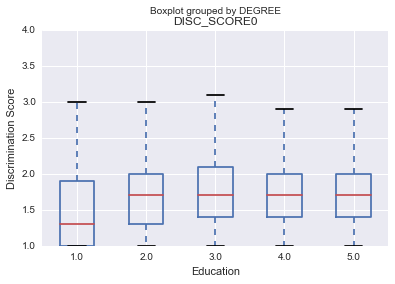

In [32]:
data.boxplot(column="DISC_SCORE0", by = "DEGREE")
plt.xlabel('Education')
plt.ylabel('Discrimination Score')

###History of CVD###

In [33]:
data.groupby('CVD').DISC_SCORE0.describe()

CVD       
0    count    3171.000000
     mean        1.716128
     std         0.497622
     min         1.000000
     25%         1.300000
     50%         1.700000
     75%         2.000000
     max         4.000000
1    count      91.000000
     mean        1.833455
     std         0.626363
     min         1.000000
     25%         1.400000
     50%         1.800000
     75%         2.200000
     max         3.700000
dtype: float64

In [34]:
y_cvd = data[data.CVD == 1]
n_cvd = data[data.CVD == 0]

mst.kruskalwallis(y_cvd[y], n_cvd[y])

KruskalResult(statistic=2.0707449073848041, pvalue=0.15014816918735649)

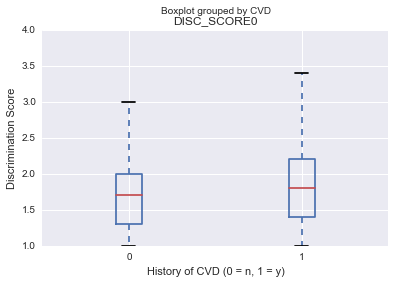

In [35]:
data.boxplot(column="DISC_SCORE0", by = "CVD")
plt.xlabel('History of CVD (0 = n, 1 = y)')
plt.ylabel('Discrimination Score')

###Income###

In [36]:
data.groupby('INCOME0').DISC_SCORE0.describe()

INCOME0       
1        count     483.000000
         mean        1.684213
         std         0.599286
         min         1.000000
         25%         1.100000
         50%         1.600000
         75%         2.100000
         max         3.500000
2        count    1077.000000
         mean        1.766383
         std         0.516314
         min         1.000000
         25%         1.400000
         50%         1.800000
         75%         2.100000
         max         4.000000
3        count    1240.000000
         mean        1.717263
         std         0.465683
         min         1.000000
         25%         1.400000
         50%         1.700000
         75%         2.000000
         max         3.900000
4        count     462.000000
         mean        1.652405
         std         0.436451
         min         1.000000
         25%         1.300000
         50%         1.600000
         75%         2.000000
         max         3.400000
dtype: float64

In [37]:
inc1 = data[data.INCOME0 == 1]
inc2 = data[data.INCOME0 == 2]
inc3 = data[data.INCOME0 == 3]
inc4 = data[data.INCOME0 == 4]

mst.kruskalwallis(inc1[y], inc2[y], inc3[y], inc4[y])

KruskalResult(statistic=23.434485304070673, pvalue=3.2779601041053325e-05)

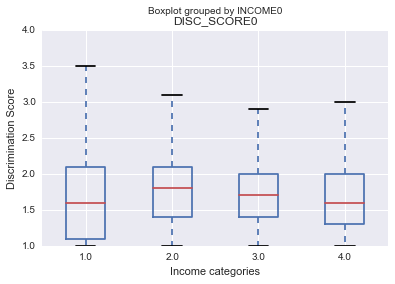

In [38]:
data.boxplot(column="DISC_SCORE0", by = "INCOME0")
plt.xlabel('Income categories')
plt.ylabel('Discrimination Score')

#6. Significance Across Discrimination Scores - Continuous#

Spearman's correlation for CRP, Perceived Stress

###C-Reactive Protein###

In [39]:
sp.stats.spearmanr(data.CRPRESU0, data[y])

SpearmanrResult(correlation=0.085755705213504008, pvalue=9.3424979107371217e-07)

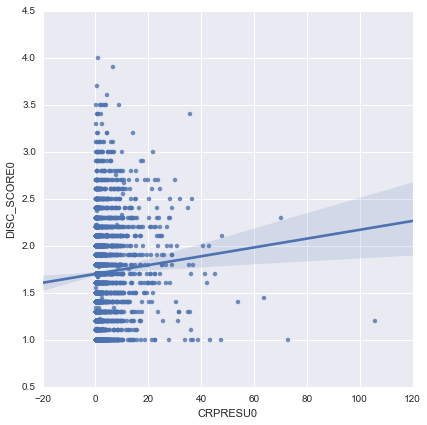

In [40]:
sns.pairplot(data, x_vars='CRPRESU0', y_vars='DISC_SCORE0', size=6, kind='reg')

###Perceived Stress###

In [41]:
sp.stats.spearmanr(data.MOD_PSTRESS, data[y])

SpearmanrResult(correlation=0.15761366927494119, pvalue=1.363976457940736e-19)

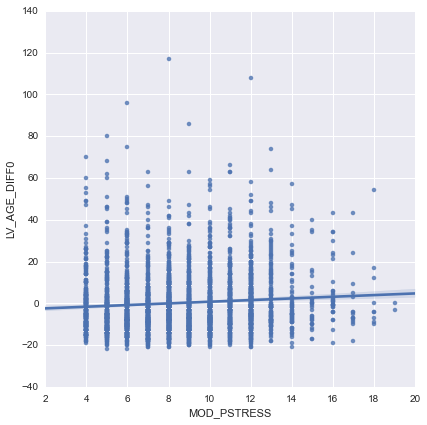

In [42]:
sns.pairplot(data, x_vars='MOD_PSTRESS', y_vars='LV_AGE_DIFF0', size=6, kind='reg')